In [1]:
# Question 1: Linear Regression
!pip install -U pandas
!pip install -U numpy
!pip install -U plotly==5.10.0

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

x = np.genfromtxt('../data/q1/linearX.csv', delimiter='\n')
y = np.genfromtxt('../data/q1/linearY.csv', delimiter='\n')

x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))

In [2]:
x.shape

(100, 1)

In [3]:
y.shape

(100, 1)

In [4]:
# Visualize data
fig = px.scatter(x[:,0],y[:,0])
fig.show()

In [5]:
# Add intercept term to x
x = np.append(np.ones((x.shape)),x,axis=1)

print(x[:,1].mean(), x[:,1].std())
# Normalize the data
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

# Num of examples and features (with intercept)
m = x.shape[0]
n = x.shape[1]

print(x[:,1].mean(), x[:,1].std())

# Visualize data
fig = px.scatter(x[:,1],y[:,0])
fig.show()

8.062 1.723123907326458
3.508304757815495e-16 1.0


In [6]:
# Question 1.a - Batch gradient descent method for optimizing J(θ)

# Initialize params
theta = np.zeros((2, 1))
alpha = 1e-2

# Prediction function: h(θ) = x^Tθ 
def predict(x, theta):
    return x.dot(theta)

# Cost function: J(θ) = 1/2m * Σ(y-h(θ))^2
def cost(x,y,theta):
    return (1/(2*m)) * np.sum((y - predict(x,theta))**2)

cost_0 = cost(x, y, theta)
print("Initial Cost value for the hypothesis with zero parameters={}".format(cost_0))


def cost_grd(x, y, theta):
    return (1/m) * (np.zeros((2,1))+  x.T.dot(x.dot(theta)-y)) 

# Gradient descent function
def batch_gradient_descent(x, y, theta, alpha, threshold=10e-8, num_iter=1000000):
    
    prev_cost=cost_0
    c=0.0
    cost_hist = np.array([cost_0])
    theta_hist = theta
    i=1
    while True:
        #Compute gradient and update theta
        theta -= alpha * cost_grd(x,y,theta)
        theta_hist = np.append(theta_hist, theta, axis=1)
        c = cost(x,y,theta)
        cost_hist = np.append(cost_hist,c)
        
        i+=1
        
        if(i%1000==0):
            print("Iteration: ",i," Cost: ",c)

        # Stop if the cost is below a threshold or if the num of iterations is above a certain amount
        if abs(cost_grd(x,y,theta)[1]) <= threshold or i >= num_iter:
            print(abs(cost_grd(x,y,theta)[1]))
            break
        prev_cost = c
        

    return theta, cost_hist, theta_hist, i



theta, cost_hist, theta_hist, iterations = batch_gradient_descent(x, y, theta, alpha)

print(f'Cost of the model is {cost_hist[-1]} with {iterations} iterations')

# Plot cost decrease
fig = px.scatter(range(iterations), cost_hist)
fig.show()


Initial Cost value for the hypothesis with zero parameters=0.4966279047145
[9.95548478e-08]
Cost of the model is 1.197530238073229e-06 with 947 iterations


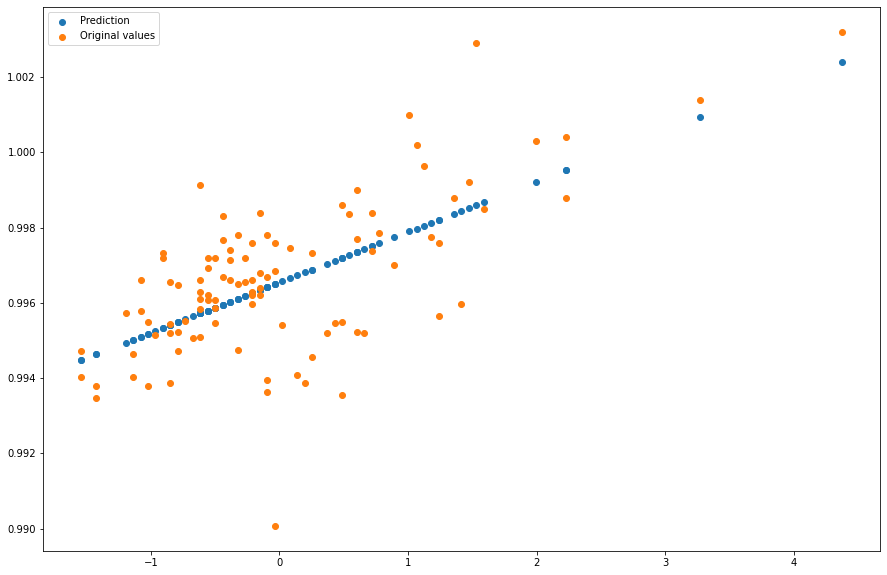

In [7]:
# Question 1.b - Plotting data and hypothesis function

# Create predictions from our linear regression model
predictions = x.dot(theta)

fig = plt.figure(figsize=(15,10))
plt.scatter(x[:,1], predictions,label='Prediction')
plt.scatter(x[:,1], y,label='Original values')
plt.legend()
plt.savefig('q1_b.png', dpi=1000)

In [8]:
# Question 1.c -  Drawing a 3d mesh of error function and the parameters
import collections
from matplotlib.animation import FuncAnimation

def cost_plt(theta_0, theta_1, p):
    return np.sum((p.y-p.x.dot(np.array([[theta_0],[theta_1]])))**2)

# Create set of points with x and y
P = collections.namedtuple('P', ['x', 'y'])
points = P(x, y)

# Create surface and contour to better see gradient descent working
t0 = np.linspace(-0.5,3.0, 50)
t1 = np.linspace(-0.5,3.0, 50)
t0, t1 = np.meshgrid(t0, t1)
c = np.array([cost_plt(t_0, t_1, points)for t_0, t_1 in zip(t0.ravel(), t1.ravel())])
c_plt = c.reshape(t0.shape)

# Create a mesh of points to plot in
theta_0, theta_1 = np.meshgrid(theta_hist[0], theta_hist[1])
c = np.array([cost_plt(theta0, theta1, points) for theta0, theta1 in zip(theta_0.ravel(), theta_1.ravel())])
c_plt_grd = c.reshape(theta_0.shape)

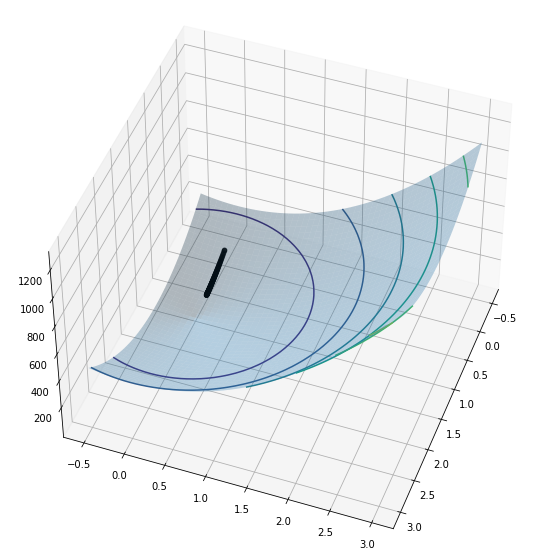

In [9]:
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 20)
ax.plot_surface(t0, t1, c_plt, alpha=0.3)

ax.contour3D(t0, t1, c_plt)

sc = ax.scatter([], [], [], marker='o', c='k')
x_, y_, z_ = [], [], []

def animate(i):
    x_.append(theta_0.ravel()[i])
    y_.append(theta_1.ravel()[i])
    z_.append(c_plt_grd.ravel()[i])
    sc._offsets3d = (x_, y_, z_)
    return sc

anim = FuncAnimation(fig, animate, frames=np.arange(0, 100), interval=200, repeat_delay=3000, blit=False)
anim.save('q1_c.gif', writer='pillow')

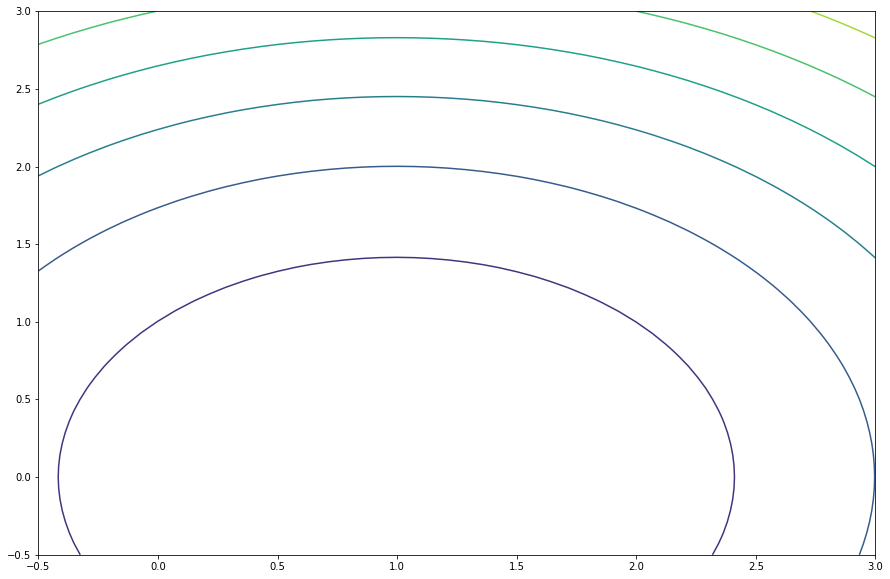

In [10]:
# Question 1.d -  Drawing the contours of error function and the parameters
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
c=ax.contour(t0,t1,c_plt)

p, = ax.plot([], [])
x_, y_ = [], []

def init():
    p.set_data([], [])
    return p,

def animate_contour(i):
    x_.append(theta_0.ravel()[i])
    y_.append(theta_1.ravel()[i])
    p.set_data(x_, y_)
    return p,

anim1 = FuncAnimation(fig, animate_contour, init_func=init, frames=np.arange(0, 100), interval=200, repeat_delay=3000, blit=False)
anim1.save('q1_d.gif', writer='pillow')

Iteration:  1000  Cost:  0.06727957841089334
Iteration:  2000  Cost:  0.00909722723624577
Iteration:  3000  Cost:  0.0012309776979822769
Iteration:  4000  Cost:  0.0001674613472508531
Iteration:  5000  Cost:  2.36740159729569e-05
Iteration:  6000  Cost:  4.233979511075723e-06
Iteration:  7000  Cost:  1.6056880317042154e-06
Iteration:  8000  Cost:  1.250343219771586e-06
Iteration:  9000  Cost:  1.2023006277073544e-06
[9.99403767e-08]
[9.83793222e-08]
[9.18833207e-08]


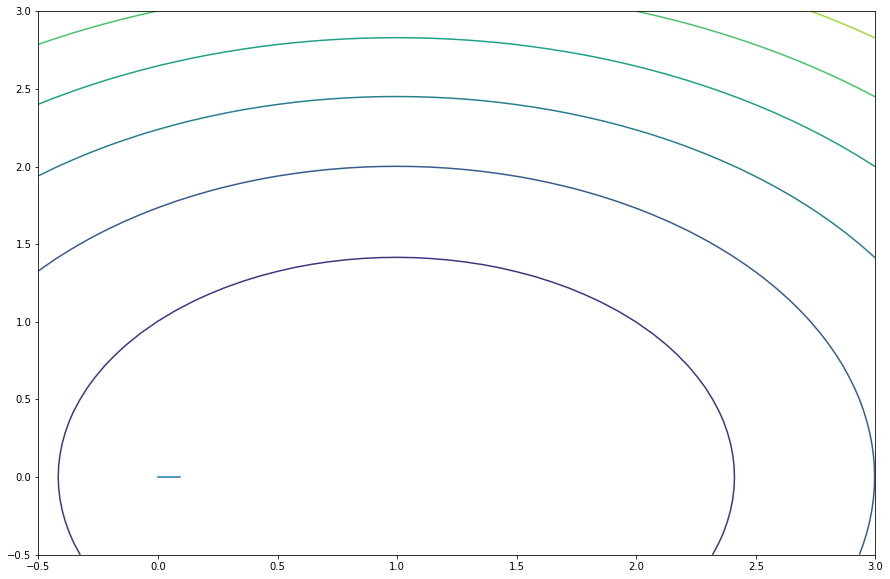

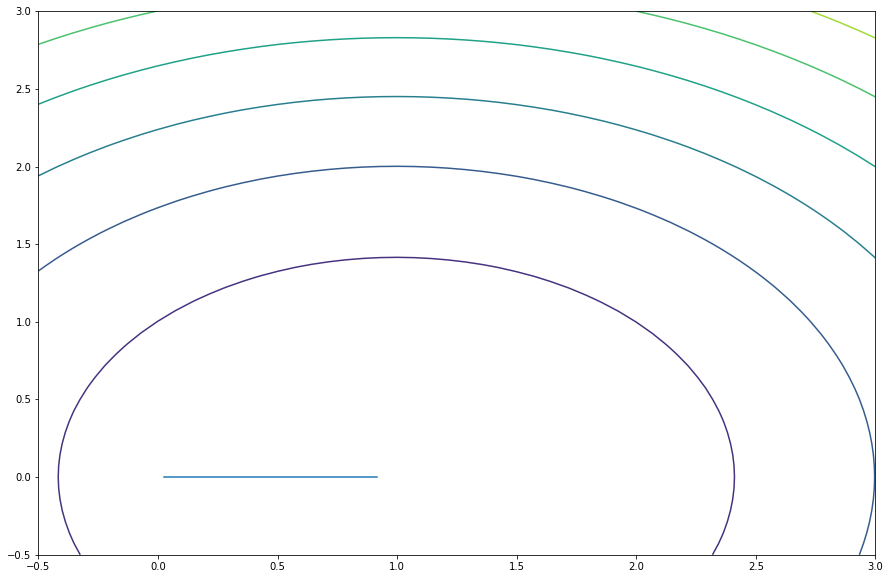

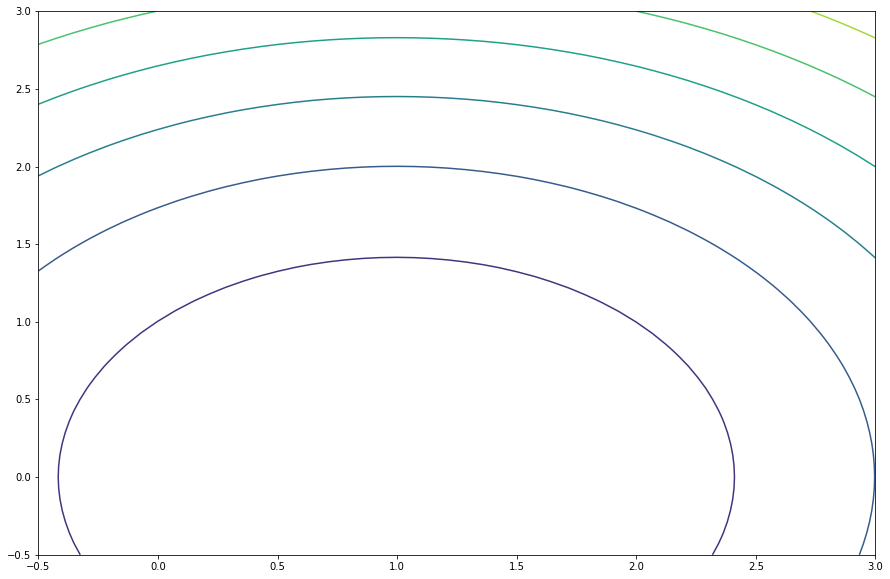

In [11]:
for step in [0.001, 0.025, 0.1]:
    theta = np.zeros((2, 1))
    theta, cost_hist, theta_hist, iterations = batch_gradient_descent(x, y, theta, step)
    
    # Create surface and contour to better see gradient descent working
    t0 = np.linspace(-0.5,3.0, 50)
    t1 = np.linspace(-0.5,3.0, 50)
    t0, t1 = np.meshgrid(t0, t1)
    c = np.array([cost_plt(t_0, t_1, points)for t_0, t_1 in zip(t0.ravel(), t1.ravel())])
    c_plt = c.reshape(t0.shape)

    # Create a mesh of points to plot in
    theta_0, theta_1 = np.meshgrid(theta_hist[0], theta_hist[1])
    c = np.array([cost_plt(theta0, theta1, points) for theta0, theta1 in zip(theta_0.ravel(), theta_1.ravel())])
    c_plt_grd = c.reshape(theta_0.shape)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    c=ax.contour(t0,t1,c_plt)

    p, = ax.plot([], [])
    x_, y_ = [], []

    anim1 = FuncAnimation(fig, animate_contour, init_func=init, frames=np.arange(0, 100), interval=200, repeat_delay=3000, blit=False)
    file = "q1_e"+str(step)+".gif" 
    anim1.save(file, writer='pillow')
    
    
    

# 